**Importing necessary libraries and TCGA Cancer Dataset**

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing our dataset
glioma_data = pd.read_csv('TCGA_InfoWithGrade.csv')
print(glioma_data.shape)

(839, 24)


In [3]:
glioma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Grade             839 non-null    int64  
 1   Gender            839 non-null    int64  
 2   Age_at_diagnosis  839 non-null    float64
 3   Race              839 non-null    int64  
 4   IDH1              839 non-null    int64  
 5   TP53              839 non-null    int64  
 6   ATRX              839 non-null    int64  
 7   PTEN              839 non-null    int64  
 8   EGFR              839 non-null    int64  
 9   CIC               839 non-null    int64  
 10  MUC16             839 non-null    int64  
 11  PIK3CA            839 non-null    int64  
 12  NF1               839 non-null    int64  
 13  PIK3R1            839 non-null    int64  
 14  FUBP1             839 non-null    int64  
 15  RB1               839 non-null    int64  
 16  NOTCH1            839 non-null    int64  
 1

In [4]:
glioma_data.describe()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,...,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000
mean,0.419547,0.418355,50.935411,0.107271,0.481526,0.414779,0.258641,0.168057,0.133492,0.132300,...,0.053635,0.047676,0.045292,0.034565,0.032181,0.032181,0.032181,0.027414,0.027414,0.026222
std,0.493779,0.493583,15.702339,0.369392,0.499957,0.492978,0.438149,0.374140,0.340309,0.339019,...,0.225431,0.213206,0.208068,0.182784,0.176586,0.176586,0.176586,0.163383,0.163383,0.159889
min,0.000000,0.000000,14.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,38.055000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,51.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,62.800000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,89.290000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# find any missing or null data points of the data set
glioma_data.isnull().sum()
glioma_data.isna().sum()

Grade               0
Gender              0
Age_at_diagnosis    0
Race                0
IDH1                0
TP53                0
ATRX                0
PTEN                0
EGFR                0
CIC                 0
MUC16               0
PIK3CA              0
NF1                 0
PIK3R1              0
FUBP1               0
RB1                 0
NOTCH1              0
BCOR                0
CSMD3               0
SMARCA4             0
GRIN2A              0
IDH2                0
FAT4                0
PDGFRA              0
dtype: int64

In [6]:
# check if any column is unique
column_names = glioma_data.columns
for i in column_names:
  print('{} is unique: {}'.format(i, glioma_data[i].is_unique))

Grade is unique: False
Gender is unique: False
Age_at_diagnosis is unique: False
Race is unique: False
IDH1 is unique: False
TP53 is unique: False
ATRX is unique: False
PTEN is unique: False
EGFR is unique: False
CIC is unique: False
MUC16 is unique: False
PIK3CA is unique: False
NF1 is unique: False
PIK3R1 is unique: False
FUBP1 is unique: False
RB1 is unique: False
NOTCH1 is unique: False
BCOR is unique: False
CSMD3 is unique: False
SMARCA4 is unique: False
GRIN2A is unique: False
IDH2 is unique: False
FAT4 is unique: False
PDGFRA is unique: False


In [7]:
pd.value_counts(glioma_data.Grade)

0    487
1    352
Name: Grade, dtype: int64

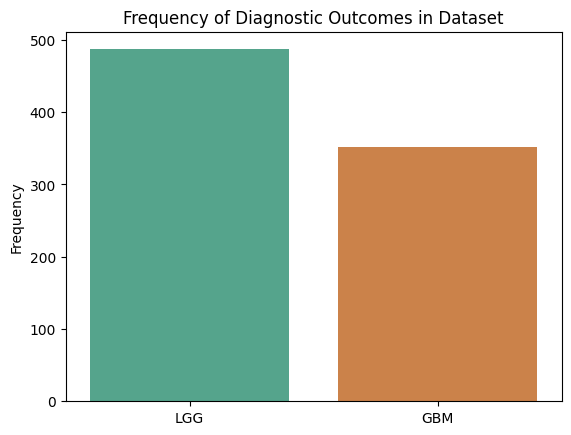

In [8]:
# Visualize frequency of diagnoses in dataset
sns.barplot(x = ['LGG', 'GBM'], y = glioma_data['Grade'].value_counts(), palette = 'Dark2', data = glioma_data, alpha = .8)
plt.title('Frequency of Diagnostic Outcomes in Dataset')
plt.ylabel('Frequency')
plt.show()

<Axes: >

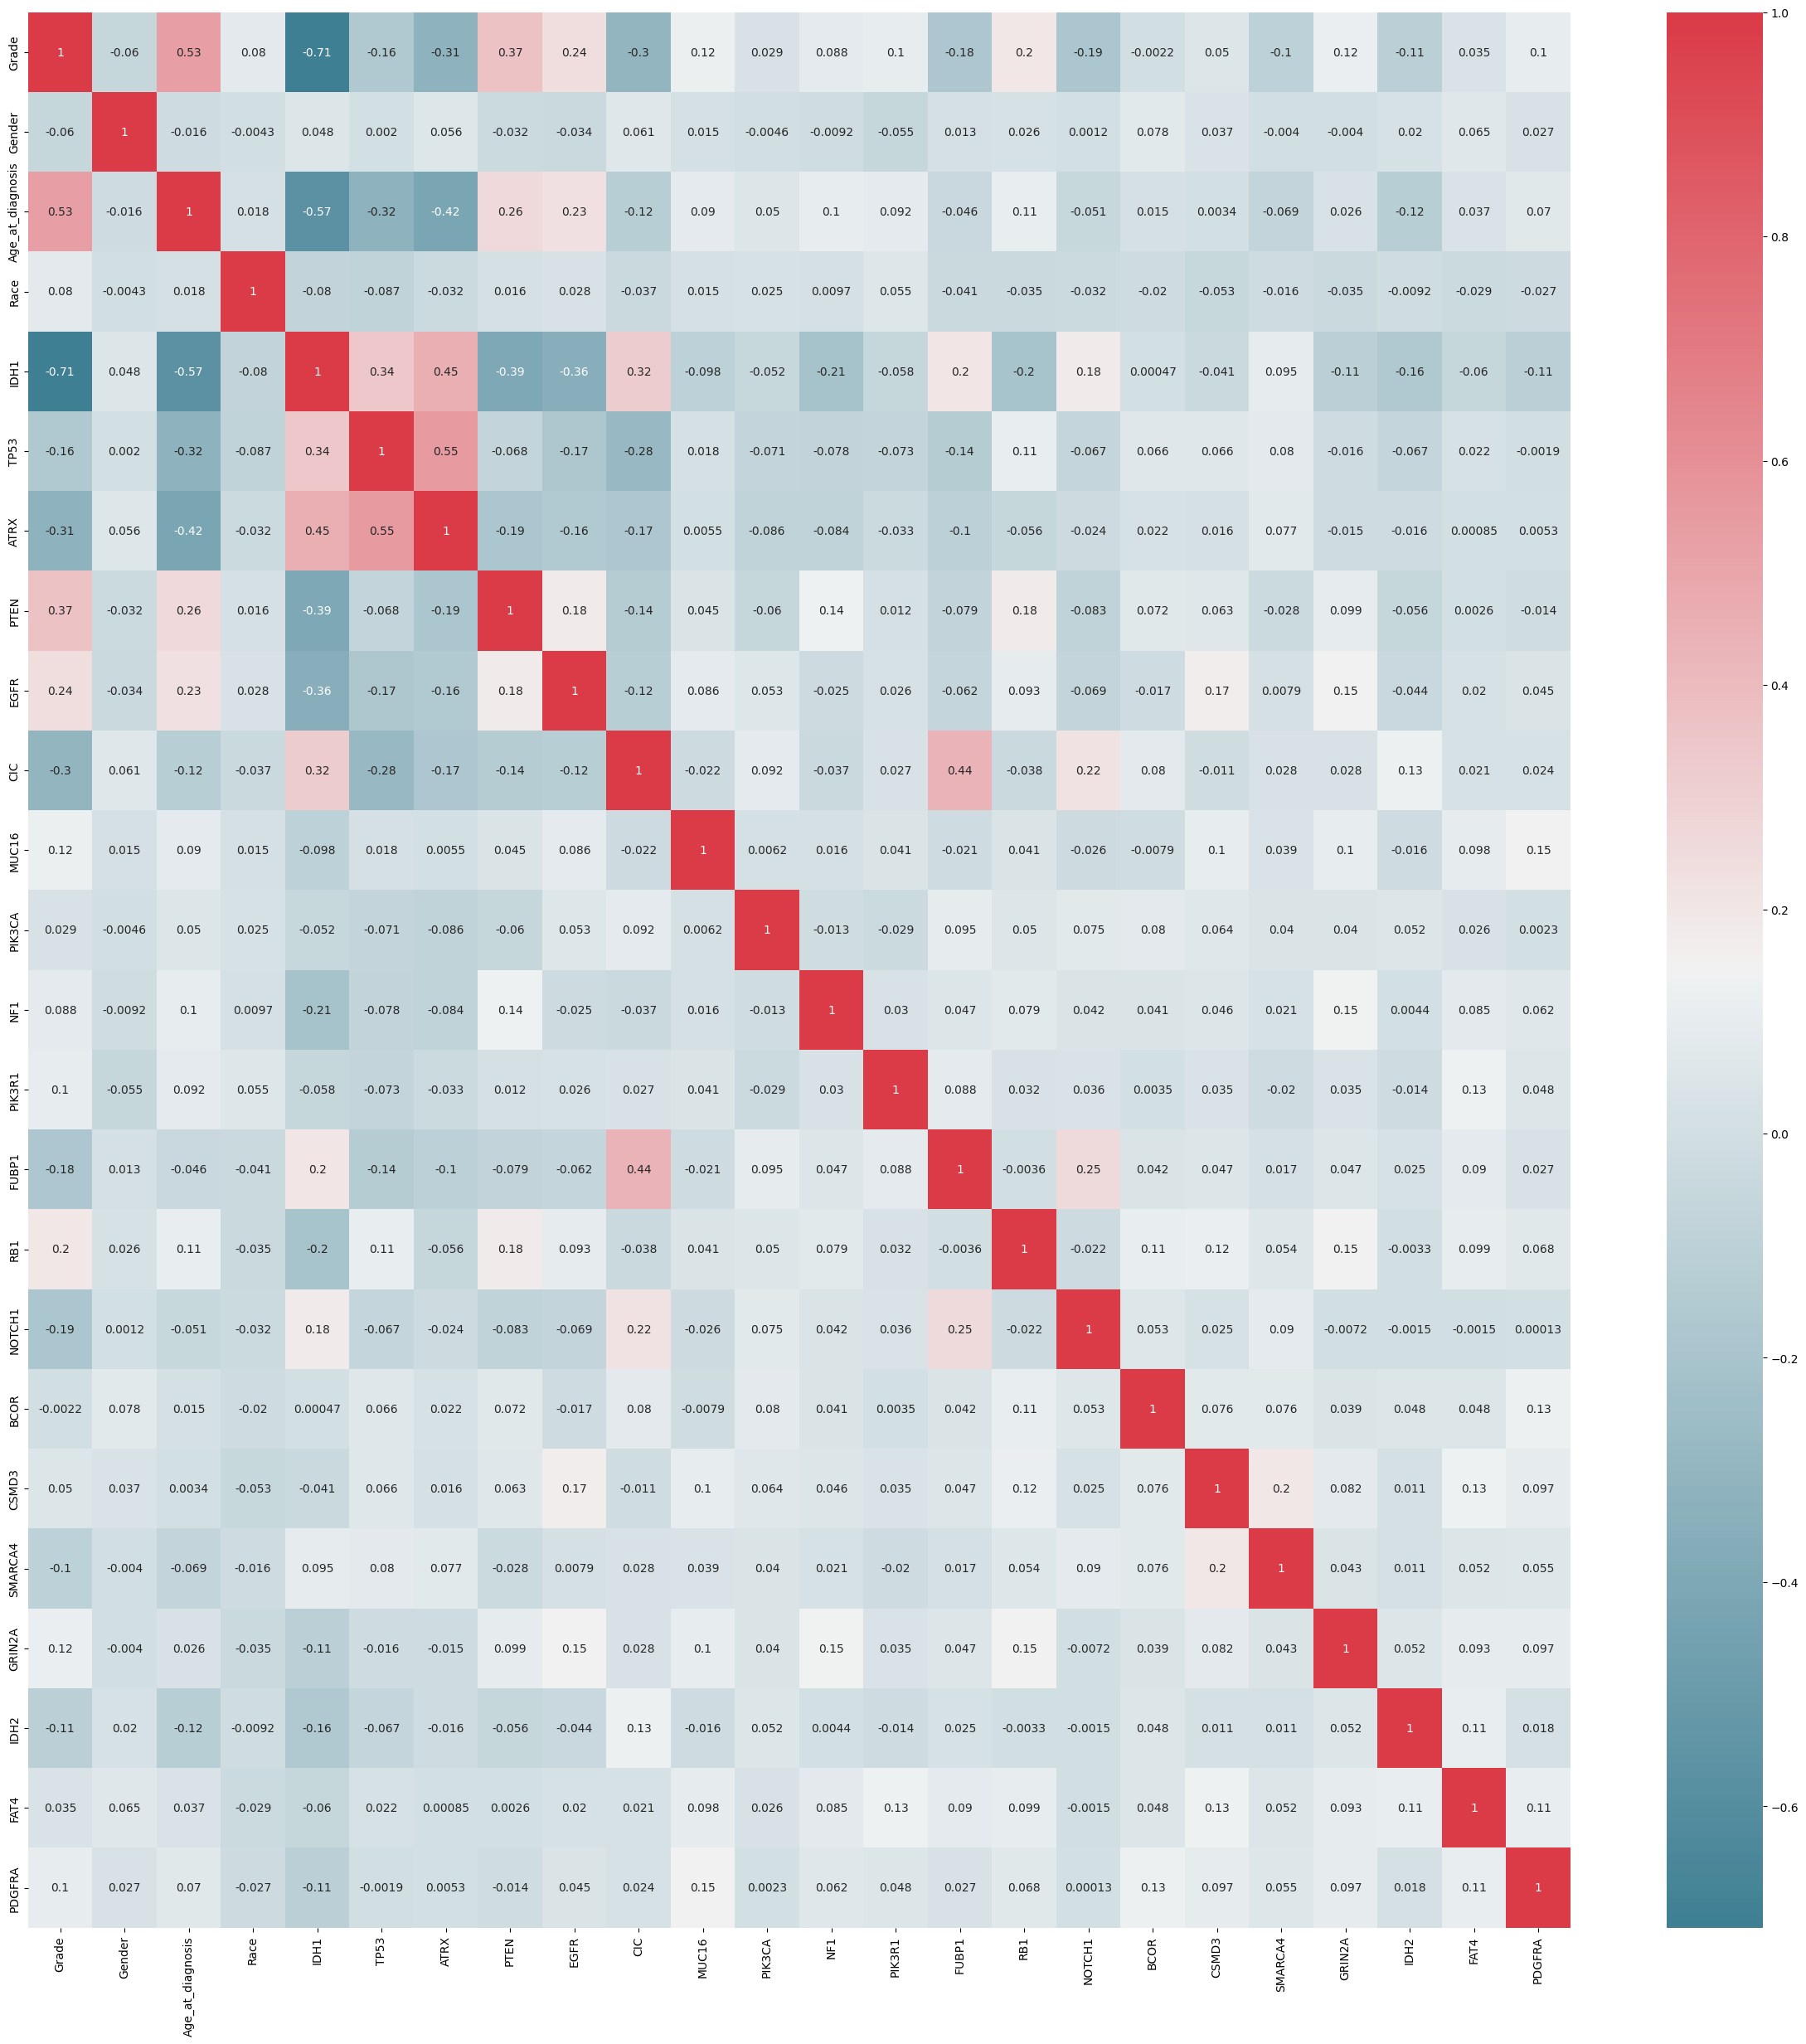

In [ ]:
#visualize the correlation

f, ax = plt.subplots(figsize=(30, 30))
corr = glioma_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool_), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            annot=True, ax=ax)

<Axes: >

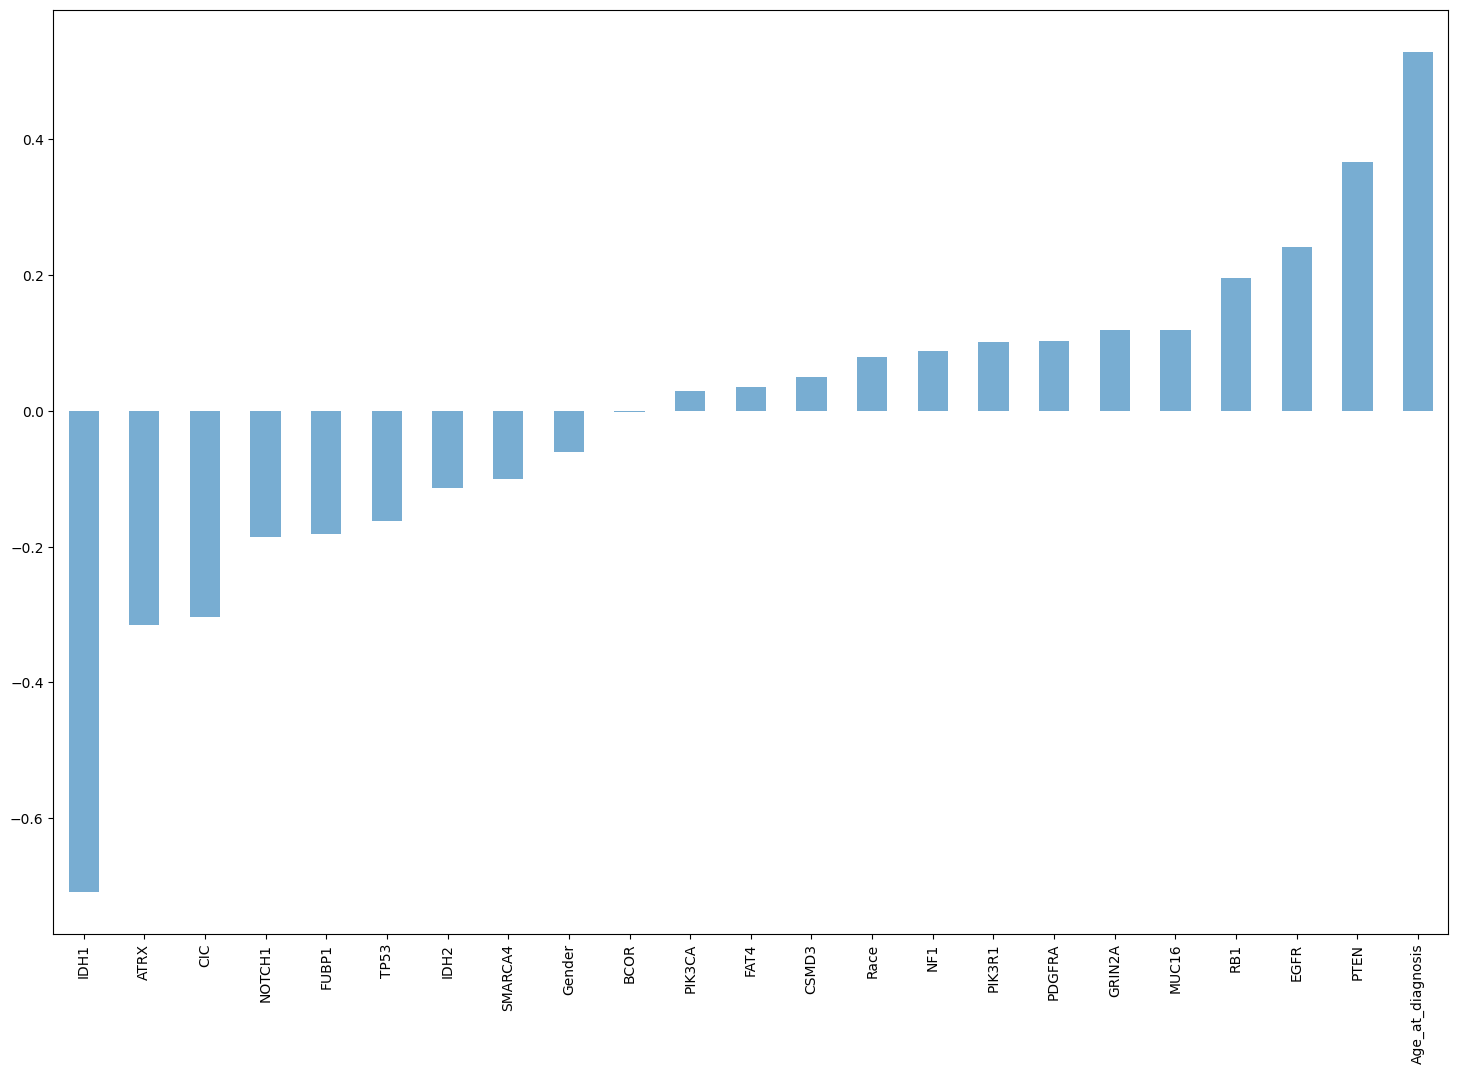

In [ ]:
#Observe correlation of features with diagnosis
f, ax = plt.subplots(figsize=(18, 12))
tst = glioma_data.corr()['Grade'].copy()
tst = tst.drop('Grade')
tst.sort_values(inplace=True)
tst.plot(kind='bar', alpha=0.6)

**SPLITTING THE DATASET**

In [8]:
X = glioma_data.drop("Grade", axis=1)
y = glioma_data["Grade"]

# drop_list1 = []
# X_1 = X.drop(drop_list1,axis = 1 )

# convert to numpy arrays
X_glioma = np.array(X.values)
y_glioma = np.array(y.values).squeeze()  # (N,)

print(X_glioma.shape)
print(y_glioma.shape)

(839, 23)
(839,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_glioma, y_glioma, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(671, 23) (671,)
(168, 23) (168,)


In [10]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler

sc_scaler = StandardScaler()

X_train = sc_scaler.fit_transform(X_train)
X_test = sc_scaler.transform(X_test)

print(X_train.shape)

(671, 23)


SMOTE to avoid data imbalance

In [11]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

**FEATURE SELECTION**


**Recursive Feature Elimination with Cross-Validation**

In [13]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

rfecv = RFECV(estimator=rfc, step=1, cv=5, scoring='accuracy')

# Fit the RFECV object on the training data
rfecv.fit(X_train_resampled, y_train_resampled)

# Print the optimal number of features selected by RFECV
print("Optimal number of features:", rfecv.n_features_)

# Print the feature ranking based on their importance
print("Feature Ranking:")
for feature_rank, feature_name in zip(rfecv.ranking_, range(X.shape[1])):
    print(f" {X.columns[feature_name]}: Rank {feature_rank}")

Optimal number of features: 21
Feature Ranking:
 Gender: Rank 1
 Age_at_diagnosis: Rank 1
 Race: Rank 1
 IDH1: Rank 1
 TP53: Rank 1
 ATRX: Rank 1
 PTEN: Rank 1
 EGFR: Rank 1
 CIC: Rank 1
 MUC16: Rank 1
 PIK3CA: Rank 1
 NF1: Rank 1
 PIK3R1: Rank 1
 FUBP1: Rank 1
 RB1: Rank 1
 NOTCH1: Rank 1
 BCOR: Rank 1
 CSMD3: Rank 3
 SMARCA4: Rank 2
 GRIN2A: Rank 1
 IDH2: Rank 1
 FAT4: Rank 1
 PDGFRA: Rank 1


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Create the SelectKBest feature selector with the f-classif scoring function
k_best_features = 15  # Number of features to select
selector = SelectKBest(score_func=f_classif, k=k_best_features)
# Fit the feature selector on the training data
selector.fit(X_train_resampled, y_train_resampled)

# Get the mask of selected features (True for selected features, False for non-selected features)
selected_mask = selector.get_support()

# Get the names of the selected features from the original feature names
selected_feature_names = np.array(X.columns)[selected_mask]
print("Selected Feature Names:", selected_feature_names)

Selected Feature Names: ['Age_at_diagnosis' 'IDH1' 'TP53' 'ATRX' 'PTEN' 'EGFR' 'CIC' 'MUC16'
 'PIK3R1' 'FUBP1' 'RB1' 'NOTCH1' 'GRIN2A' 'IDH2' 'PDGFRA']


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from numpy import array
select = SelectKBest(score_func=chi2, k=10)
z = select.fit_transform(X,y)

print("After selecting best 10 features:", z.shape)

filter = select.get_support()
features = X.columns

print("All features:")
print(features)

print("Selected best 10:")
print(features[filter])

After selecting best 10 features: (839, 10)
All features:
Index(['Gender', 'Age_at_diagnosis', 'Race', 'IDH1', 'TP53', 'ATRX', 'PTEN',
       'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1',
       'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4',
       'PDGFRA'],
      dtype='object')
Selected best 10:
Index(['Age_at_diagnosis', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC',
       'FUBP1', 'RB1', 'NOTCH1'],
      dtype='object')


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.naive_bayes import GaussianNB
selector = SequentialFeatureSelector(GaussianNB(), n_features_to_select='auto', direction='forward', scoring="balanced_accuracy", tol=0.01, cv=5)
selector.fit_transform(X_train_resampled,y_train_resampled)
features = X.columns
features[selector.get_support()]

Index(['IDH1', 'IDH2'], dtype='object')

In [ ]:
drop_list1 = ['BCOR', 'CSMD3']
X_1 = X.drop(drop_list1,axis = 1 )

drop_list2 = ['Gender','Race', 'PIK3CA', 'NF1', 'BCOR', 'CSMD3', 'SMARCA4', 'FAT4']
X_2 = X.drop(drop_list2,axis = 1 )

drop_list3 = ['Gender','Race','MUC16', 'PIK3CA', 'NF1', 'PIK3R1','BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4',
       'PDGFRA']
X_3 = X.drop(drop_list3,axis = 1 )


### Different classifiers


In [12]:
# 1. Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param = {
    'criterion': ['gini', "entropy"],
    'max_depth': [i for i in range(5, 51, 5)], # [30, 50, 60, 100]
    'min_samples_leaf': [i for i in range(2, 11, 1)], # [2, 3, 5, 10]
    'min_impurity_decrease': [0.1, 0.2, 0.3, 0.4, 0.5] # [0.1, 0.2, 0.5]
}
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid=param, cv=6) # default scoring: accuracy_score
grid_dt.fit(X_train_resampled, y_train_resampled)
print('Best DT Classifier:', grid_dt.best_params_, 'Best Score:', grid_dt.best_score_)

Best DT Classifier: {'criterion': 'gini', 'max_depth': 5, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 2} Best Score: 0.8681362497151972


In [13]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_leaf=2, min_impurity_decrease=0.1)
dt_clf.fit(X_train_resampled, y_train_resampled)
print("DT's accuracy: %.2f%%" % (100*dt_clf.score(X_test, y_test)))

DT's accuracy: 83.93%


In [14]:
# 2. Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

param_gnb = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}

grid_gnb = GridSearchCV(GaussianNB(), param_gnb, cv=5) #, verbose=VERBOSE, n_jobs=N_JOBS)
grid_gnb.fit(X_train_resampled, y_train_resampled)
print('Best GNB Classifier:', grid_gnb.best_params_, 'Best Score:', grid_gnb.best_score_)

Best GNB Classifier: {'var_smoothing': 0.01} Best Score: 0.8731210691823901


In [15]:
gnb_clf = GaussianNB(var_smoothing=0.01)
gnb_clf = gnb_clf.fit(X_train_resampled, y_train_resampled)
# y_chip_pred = gnb_clf.predict(X_chip_test)
print(gnb_clf.score(X_test, y_test))

0.8511904761904762


In [16]:
#3. GaussianProcessClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
gpc = GaussianProcessClassifier()
param_grid = {
    'kernel': [1.0 * RBF(length_scale=1.0), 1.0 * RBF(length_scale=0.5), 1.0 * RBF(length_scale=2.0)],
    'n_restarts_optimizer': [0, 1, 2]
}
grid_search = GridSearchCV(gpc, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)
print('Best GPC Classifier:', grid_search.best_params_, 'Best Score:', grid_search.best_score_)

Best GPC Classifier: {'kernel': 1**2 * RBF(length_scale=1), 'n_restarts_optimizer': 0} Best Score: 0.8844261006289308


In [17]:
gpc_clf = GaussianProcessClassifier(kernel= 1**2 * RBF(length_scale=1), n_restarts_optimizer= 0)
gpc_clf.fit(X_train_resampled, y_train_resampled)
print(gpc_clf.score(X_test, y_test))

0.8571428571428571


In [18]:
#4.XGBClassifier
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'gamma': [0, 0.1, 0.2]
}
grid_xgb = GridSearchCV(xgb_classifier, param_grid, cv=5, n_jobs=-1)
grid_xgb.fit(X_train_resampled, y_train_resampled)
print('Best XGB Classifier:', grid_xgb.best_params_, 'Best Score:', grid_xgb.best_score_)

Best XGB Classifier: {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50} Best Score: 0.8894575471698115


In [19]:
xgb_clf = xgb.XGBClassifier(gamma= 0, learning_rate= 0.2, max_depth= 3, n_estimators= 50)
xgb_clf.fit(X_train_resampled, y_train_resampled)
print(xgb_clf.score(X_test, y_test))

0.8571428571428571


In [20]:
#5. GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier()
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}
grid_search_gbc = GridSearchCV(gb_classifier, param_grid, cv=5, n_jobs=-1)
grid_search_gbc.fit(X_train_resampled, y_train_resampled)
print('Best GBC Classifier:', grid_search_gbc.best_params_, 'Best Score:', grid_search_gbc.best_score_)

Best GBC Classifier: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50, 'subsample': 0.8} Best Score: 0.8919575471698113


In [21]:
gbc_clf = GradientBoostingClassifier(learning_rate= 0.01, max_depth= 3, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 200, subsample= 0.8)
gbc_clf.fit(X_train_resampled, y_train_resampled)
print(gbc_clf.score(X_test, y_test))

0.8630952380952381


**ENSEMBLE METHODS**

VOTING CLASSIFIER

In [22]:
from itertools import combinations
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve)
estimators = [("GNB", gnb_clf), ("DT", dt_clf), ("XGB", xgb_clf), ("GPC", gpc_clf), ("GBC", gbc_clf)]

vot_classifiers = []
for n in range(3, 6):
    for subset in combinations(estimators, n):
        vot_classifier = VotingClassifier(estimators=list(subset), voting='soft')
        vot_classifiers.append(vot_classifier)

results_df = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_dff = pd.DataFrame(columns=['Classifier', 'TP', 'FP', 'FN', 'TN'])


for vc in vot_classifiers:
    vc.fit(X_train_resampled, y_train_resampled)
    y_pred = vc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    classifier_name = [name for name, _ in vc.estimators]
    clasf_names_str = ', '.join(classifier_name)
    cm = confusion_matrix(y_test, y_pred)
    tp, fp, fn, tn = cm.ravel()
    results_df = results_df.append({'Classifier': clasf_names_str, 'Accuracy': accuracy,
                                    'Precision': precision, 'Recall': recall, 'F1 Score': f1},
                                   ignore_index=True)
    results_dff = results_dff.append({'Classifier': clasf_names_str, 'TP': tp, 'FP': fp, 'FN': fn, 'TN': tn},ignore_index=True)


In [23]:
combo = results_df.style.format(precision=3)
def highlight_max(s):
    is_max = s == s.max()
    return ['background: lightgreen' if cell else '' for cell in is_max]
combo.apply(highlight_max)

,Classifier,Accuracy,Precision,Recall,F1 Score
0,"GNB, DT, XGB",0.863,0.804,0.937,0.865
1,"GNB, DT, GPC",0.857,0.802,0.924,0.859
2,"GNB, DT, GBC",0.863,0.804,0.937,0.865
3,"GNB, XGB, GPC",0.869,0.813,0.937,0.871
4,"GNB, XGB, GBC",0.869,0.813,0.937,0.871
5,"GNB, GPC, GBC",0.863,0.811,0.924,0.864
6,"DT, XGB, GPC",0.869,0.813,0.937,0.871
7,"DT, XGB, GBC",0.857,0.796,0.937,0.860
8,"DT, GPC, GBC",0.857,0.796,0.937,0.860
9,"XGB, GPC, GBC",0.869,0.820,0.924,0.869


In [24]:
results_dff

,Classifier,TP,FP,FN,TN
0,"GNB, DT, XGB",71,18,5,74
1,"GNB, DT, GPC",71,18,6,73
2,"GNB, DT, GBC",71,18,5,74
3,"GNB, XGB, GPC",72,17,5,74
4,"GNB, XGB, GBC",72,17,5,74
5,"GNB, GPC, GBC",72,17,6,73
6,"DT, XGB, GPC",72,17,5,74
7,"DT, XGB, GBC",70,19,5,74
8,"DT, GPC, GBC",70,19,5,74
9,"XGB, GPC, GBC",73,16,6,73


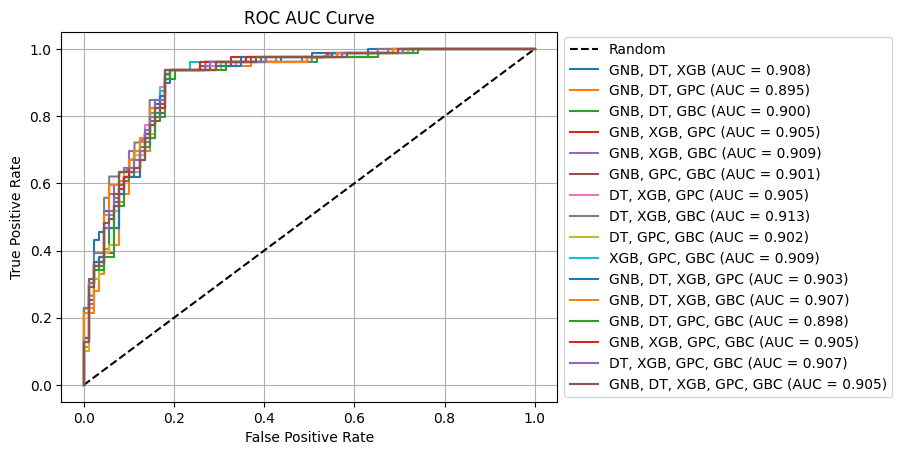

In [25]:
plt.plot([0, 1], [0, 1], 'k--', label='Random')

for vc in vot_classifiers:
    vc.fit(X_train_resampled, y_train_resampled)
    y_pred_proba = vc.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    classifier_name = [name for name, _ in vc.estimators]
    clasf_names_str = ', '.join(classifier_name)
    plt.plot(fpr, tpr, label=f'{clasf_names_str} (AUC = {roc_auc:.3f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

Stacking Classifier

In [ ]:
from sklearn.ensemble import StackingClassifier

estimators = [("GNB", gnb_clf), ("DT", dt_clf), ('XGB', xgb_clf), ('GPC', gpc_clf), ("GBC", gbc_clf)]
stk_classifiers = []
for n in range(3, 6):
    for subset in combinations(estimators, n):
        stk_classifier = StackingClassifier(estimators=list(subset), final_estimator=gnb_clf)
        stk_classifiers.append(stk_classifier)

stk_results = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
stk_resultss = pd.DataFrame(columns=['Classifier', 'TP', 'FP', 'FN', 'TN'])


for stk in stk_classifiers:
    stk.fit(X_train_resampled, y_train_resampled)
    y_pred = stk.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    classifier_name = [name for name, _ in stk.estimators]
    clasf_names_str = ', '.join(classifier_name)
    cm = confusion_matrix(y_test, y_pred)
    tp, fp, fn, tn = cm.ravel()
    stk_results = stk_results.append({'Classifier': clasf_names_str, 'Accuracy': accuracy,
                                    'Precision': precision, 'Recall': recall, 'F1 Score': f1},
                                   ignore_index=True)
    stk_resultss = stk_resultss.append({'Classifier': clasf_names_str, 'TP': tp, 'FP': fp, 'FN': fn, 'TN': tn},ignore_index=True)

In [46]:
stk_combo = stk_results.style.format(precision=3)
def highlight_max(s):
    is_max = s == s.max()
    return ['background: lightgreen' if cell else '' for cell in is_max]
stk_combo.apply(highlight_max)


,Classifier,Accuracy,Precision,Recall,F1 Score
0,"GNB, DT, XGB",0.857,0.809,0.911,0.857
1,"GNB, DT, GPC",0.857,0.809,0.911,0.857
2,"GNB, DT, GBC",0.851,0.800,0.911,0.852
3,"GNB, XGB, GPC",0.857,0.816,0.899,0.855
4,"GNB, XGB, GBC",0.869,0.813,0.937,0.871
5,"GNB, GPC, GBC",0.863,0.818,0.911,0.862
6,"DT, XGB, GPC",0.869,0.820,0.924,0.869
7,"DT, XGB, GBC",0.857,0.796,0.937,0.860
8,"DT, GPC, GBC",0.875,0.822,0.937,0.876
9,"XGB, GPC, GBC",0.869,0.820,0.924,0.869


In [ ]:
stk_resultss

,Classifier,TP,FP,FN,TN
0,"GNB, DT, XGB",72,17,5,74
1,"GNB, DT, GPC",72,17,6,73
2,"GNB, DT, GBC",71,18,7,72
3,"GNB, XGB, GPC",73,16,6,73
4,"GNB, XGB, GBC",72,17,5,74
5,"GNB, GPC, GBC",73,16,7,72
6,"DT, XGB, GPC",73,16,6,73
7,"DT, XGB, GBC",71,18,5,74
8,"DT, GPC, GBC",73,16,5,74
9,"XGB, GPC, GBC",73,16,7,72


In [47]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


# Define the base classifier
base_classifiers = RandomForestClassifier()

# Create the bagging classifier
bagging_clf = BaggingClassifier(base_estimator=base_classifiers, n_estimators=10, random_state=42)

# Train the bagging classifier on the training data
bagging_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = bagging_clf.predict(X_test)

# Evaluate the ensemble's performance
accuracy = accuracy_score(y_test, y_pred)
print("Ensemble Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Ensemble Accuracy: 0.8690476190476191


In [51]:
from sklearn.ensemble import AdaBoostClassifier

# Define the base classifier
base_classifier = RandomForestClassifier()


# Create the AdaBoost classifier
adaboost_clf = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the AdaBoost classifier on the training data
adaboost_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = adaboost_clf.predict(X_test)

# Evaluate the ensemble's performance
accuracy = accuracy_score(y_test, y_pred)
print("Ensemble Accuracy:", accuracy)

Ensemble Accuracy: 0.8273809523809523
